# Monitoring of NACHOS12.L75-MAA13 

__author__ : Aurélie Albert & Julien Le Sommer (MEOM)

__context__ : 22-GLO-HR project : Lot 1 - Ocean Modelling

__date__ : 13 December 2017

__purpose__ : Monitoring for NACHOS12.L75-MAA13 simulation

__practical steps__ :

  * NACHOS12.L75-MAA13 simulation has run for the 2010 to 2013 period
  * We compute the mean for 2011-2013 
      - for direct outputs (T,S,U,V,W,SSH, Ice concentration & volume, fluxes)
      - for diagnostics (EKE, MXL,PSI) 
      
  * Maps on orthographic and Plate Carrée projections are produced and shown here
  
__external tools used __ : 


 * CDFTOOLS : https://github.com/meom-group/CDFTOOLS
 
__licence__ : This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License</a>.

In [3]:
import sys
import numpy as np
import numpy.ma as ma
import xarray as xr
import matplotlib.pyplot as plt
sys.path.insert(0,'/home/albert7a/lib/python/cartopy/lib/cartopy')
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
import cmocean

%matplotlib inline


In [4]:
case='MAA13'
year='2011-2013'

dirmean='/media/extra/DATA/NACHOS12.L75/NACHOS12.L75-'+case+'-MEAN/'+year+'/'

title="NACHOS12.L75-"+case+" "+year

fileflxT=dirmean+'NACHOS12.L75-'+case+'_y'+year+'.1d_flxT.nc'
fileT=dirmean+'NACHOS12.L75-'+case+'_y'+year+'.1d_gridT.nc'
fileEKE=dirmean+'NACHOS12.L75-'+case+'_y'+year+'.1d_EKE.nc'
fileMXL03=dirmean+'NACHOS12.L75-'+case+'_y'+year+'m03.1d_MXL.nc'
fileMXL09=dirmean+'NACHOS12.L75-'+case+'_y'+year+'m09.1d_MXL.nc'
fileICE03=dirmean+'NACHOS12.L75-'+case+'_y'+year+'m03.1d_icemod3.nc'
fileICE09=dirmean+'NACHOS12.L75-'+case+'_y'+year+'m09.1d_icemod3.nc'
filePSI=dirmean+'NACHOS12.L75-'+case+'_y'+year+'.1d_PSI.nc'

dsT=xr.open_dataset(fileT)
tem=dsT.votemper[0]
sal=dsT.vosaline[0]
ssh=dsT.sossheig[0]
lat=dsT.nav_lat
lon=dsT.nav_lon

dsMXL03=xr.open_dataset(fileMXL03)
mxl03_rho010=dsMXL03.somxl010[0]
mxl03_rho030=dsMXL03.somxl030[0]
mxl03_t02=dsMXL03.somxlt02[0]
dsMXL09=xr.open_dataset(fileMXL09)
mxl09_rho010=dsMXL09.somxl010[0]
mxl09_rho030=dsMXL09.somxl030[0]
mxl09_t02=dsMXL09.somxlt02[0]

dsEKE=xr.open_dataset(fileEKE)
eke=dsEKE.voeke[0,0]

dsPSI=xr.open_dataset(filePSI)
psi=dsPSI.sobarstf[0]

dsflxT=xr.open_dataset(fileflxT)
Heat=dsflxT.sohefldo[0]
WaterFlx=dsflxT.sowaflup[0]
WaterDmp=dsflxT.sowafld[0]

dsICE03=xr.open_dataset(fileICE03)
iconc03=dsICE03.siconc[0]
ivolu03=dsICE03.sivolu[0]

dsICE09=xr.open_dataset(fileICE09)
iconc09=dsICE09.siconc[0]
ivolu09=dsICE09.sivolu[0]


In [ ]:
def plot_glob(fig,sub,var,vmin,vmax,unit,name,pal):
        ax = fig.add_subplot(sub,projection=ccrs.Orthographic(central_longitude=-30,
                                                    central_latitude=35))
        cmap = plt.get_cmap(pal)
        cmap.set_under(color='grey')
        pcolor=ax.pcolormesh(lon,lat,ma.masked_invalid(var),transform=ccrs.PlateCarree(),cmap=cmap,vmin=vmin,vmax=vmax)
        ax.set_global()
        ax.add_feature(cfeature.LAND,facecolor='grey')
        ax.coastlines()
        cbar=plt.colorbar(pcolor,orientation='vertical',fraction=0.026,pad=0.1,label=unit)
        cbar.ax.tick_params(labelsize=20)
        ax.set_title(name,size=17)

def plot_glob_cont(fig,sub,var,unit,name,vmin,vmax):
        ax = fig.add_subplot(sub,projection=ccrs.Orthographic(central_longitude=-30,
                                                    central_latitude=35))
        pcolor=ax.pcolormesh(lon,lat,ma.masked_invalid(var),transform=ccrs.PlateCarree(),cmap='Blues',vmin=vmin,vmax=vmax)
        pcont=ax.contour(lon,lat,ma.masked_invalid(var),10,colors='k',transform=ccrs.PlateCarree())
        ax.set_global()
        ax.add_feature(cfeature.LAND,facecolor='black')
        ax.coastlines()
        cbar = plt.colorbar(pcolor,orientation='vertical',fraction=0.026,pad=0.1,label=unit)

        ax.set_title(name,size=17)


def plot_atl(fig,sub,var,vmin,vmax,unit,name,pal):
        ax = fig.add_subplot(sub,projection=ccrs.PlateCarree(central_longitude=-30))
        cmap = plt.get_cmap(pal)
        ax.set_extent([-100, 50, 0, 70])
        cmap.set_under(color='grey')
        pcolor=ax.pcolormesh(lon,lat,ma.masked_invalid(var),transform=ccrs.PlateCarree(),cmap=cmap,vmin=vmin,vmax=vmax)
        ax.add_feature(cfeature.LAND,facecolor='grey')
        ax.coastlines()
        gl=ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')

        fig.subplots_adjust(right=0.8)
        gl.xlocator = mticker.FixedLocator([-110,-90,-70,-50,-30,-10,10,30,50,70,90,110])
        gl.ylocator = mticker.FixedLocator([-10,0,10,20,30,40,50,60,70,80])
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER
        gl.xlabel_style = {'size': 15, 'color': 'gray'}
        gl.ylabel_style = {'size': 15, 'color': 'gray'}
        gl.xlabels_top = False
        gl.ylabels_left = False

        cbar = plt.colorbar(pcolor,orientation='horizontal',shrink=0.75,label=unit)
        ax.set_title(name,size=17,y=1.08)
  
def plot_atl_cont(fig,sub,var,unit,name,vmin,vmax):
        ax = fig.add_subplot(sub,projection=ccrs.PlateCarree(central_longitude=-30))
        ax.set_extent([-100, 50, 0, 70])
        pcolor=ax.pcolormesh(lon,lat,ma.masked_invalid(var),transform=ccrs.PlateCarree(),cmap='Blues',vmin=vmin,vmax=vmax)
        pcont=ax.contour(lon,lat,ma.masked_invalid(var),10,colors='k',transform=ccrs.PlateCarree())
        ax.add_feature(cfeature.LAND,facecolor='black')
        ax.coastlines()
        gl=ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='grey', alpha=0.5, linestyle='--')

        fig.subplots_adjust(right=0.8)
        gl.xlocator = mticker.FixedLocator([-110,-90,-70,-50,-30,-10,10,30,50,70,90,110])
        gl.ylocator = mticker.FixedLocator([-10,0,10,20,30,40,50,60,70,80])
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER
        gl.xlabel_style = {'size': 15, 'color': 'gray'}
        gl.ylabel_style = {'size': 15, 'color': 'gray'}
        cbar = plt.colorbar(pcolor,orientation='horizontal',shrink=0.75, label=unit)

        ax.set_title(name,size=17,y=1.08)

def plot_natl(fig,sub,var,vmin,vmax,unit,name,pal):
        ax = fig.add_subplot(sub,projection=ccrs.PlateCarree(central_longitude=-30))
        ax.set_extent([-100, 50, 50, 70])
        cmap = plt.get_cmap(pal)
        cmap.set_under(color='grey')
        pcolor=ax.pcolormesh(lon,lat,ma.masked_invalid(var),transform=ccrs.PlateCarree(),cmap=cmap,vmin=vmin,vmax=vmax)
        ax.add_feature(cfeature.LAND,facecolor='grey')
        ax.coastlines()
        gl=ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')

        fig.subplots_adjust(right=0.8)
        gl.xlocator = mticker.FixedLocator([-110,-100,-90,-80,-70,-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80,90,100,110])
        gl.ylocator = mticker.FixedLocator([-15,-10,-5,0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,90])
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER
        gl.xlabel_style = {'size': 15, 'color': 'gray'}
        gl.ylabel_style = {'size': 15, 'color': 'gray'}
        gl.xlabels_top = False
        gl.ylabels_left = False
        cbar = plt.colorbar(pcolor,orientation='horizontal',shrink=0.75)
        ax.set_title(name+' '+unit,size=17,y=1.09)


TypeError: plot_glob_cont() takes exactly 6 arguments (7 given)

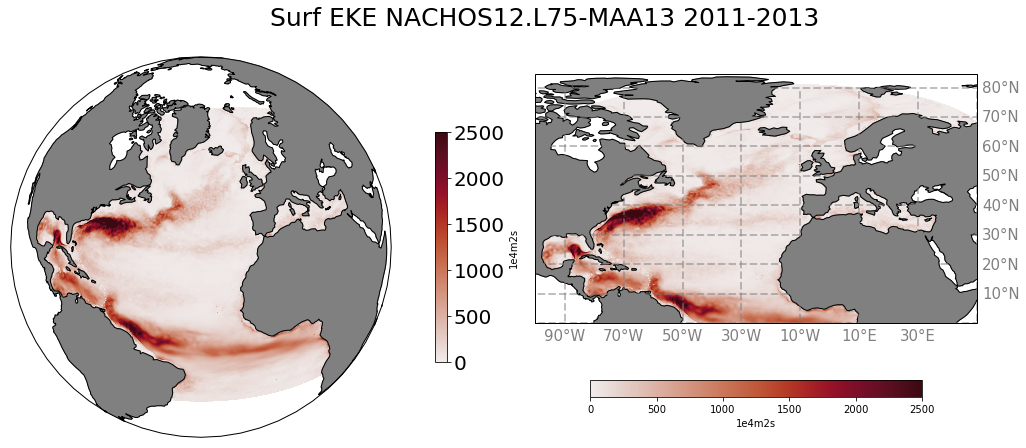

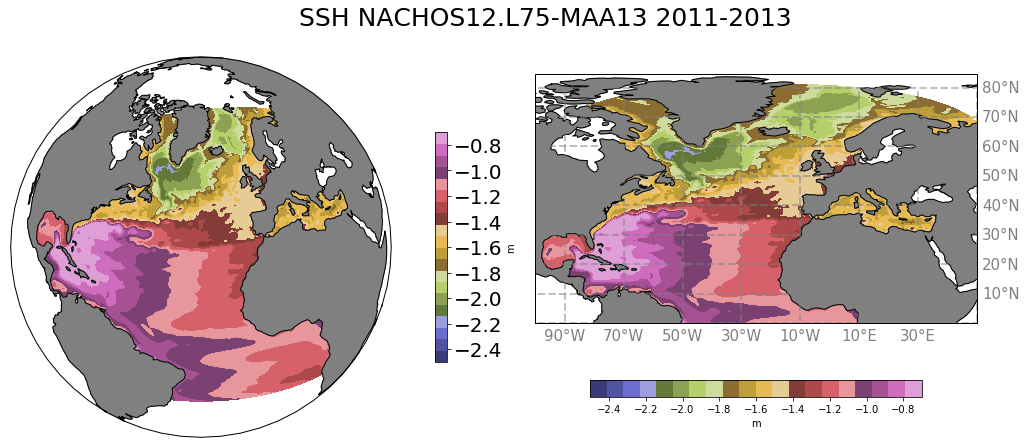

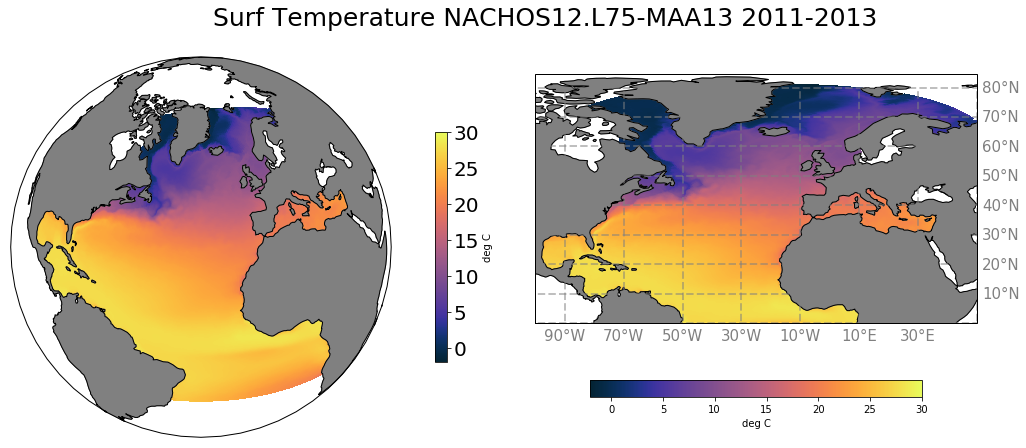

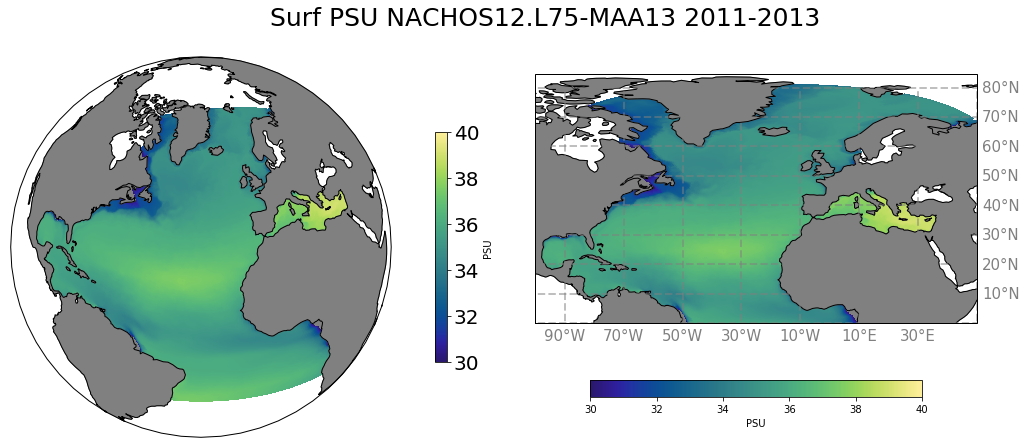

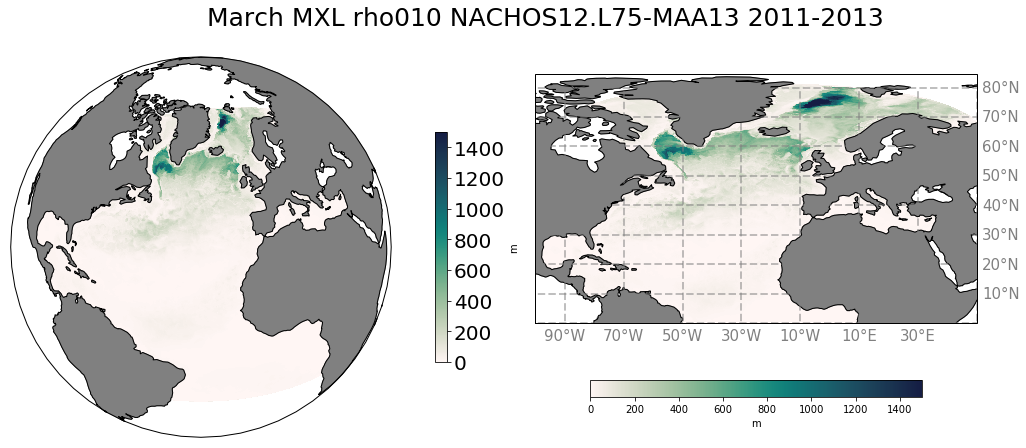

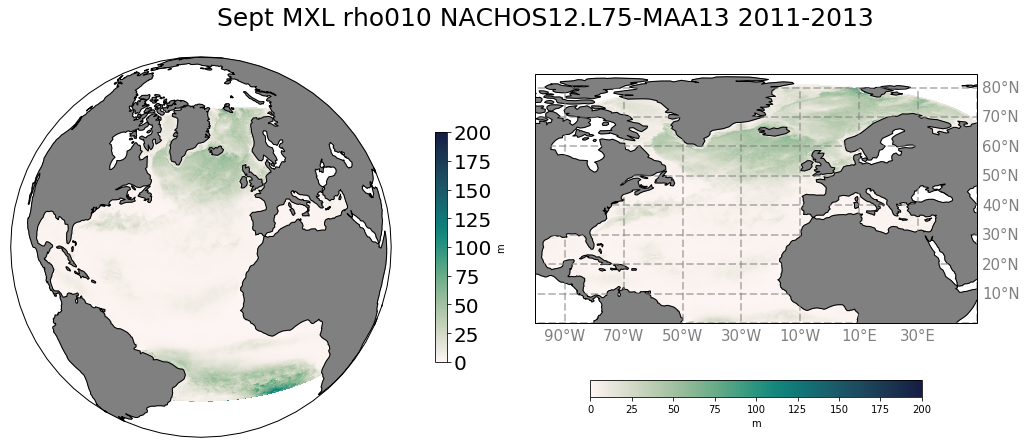

In [10]:
# Tous les plots glob et atl cote à cote
# Eke, SSH,T et S

fig = plt.figure(figsize=(20,7))
plot_glob(fig,121,10000*eke,0,2500,'1e4m2s','',cmocean.cm.amp)
plot_atl(fig,122,10000*eke,0,2500,'1e4m2s','',cmocean.cm.amp)
fig.suptitle('Surf EKE NACHOS12.L75-'+case+' '+year, fontsize=25)

fig = plt.figure(figsize=(20,7))
plot_glob(fig,121,ssh,-2.5,-0.7,'m','','tab20b')
plot_atl(fig,122,ssh,-2.5,-0.7,'m','','tab20b')
fig.suptitle('SSH NACHOS12.L75-'+case+' '+year, fontsize=25)

fig = plt.figure(figsize=(20,7))
plot_glob(fig,121,tem[0],-2,30,'deg C','',cmocean.cm.thermal)
plot_atl(fig,122,tem[0],-2,30,'deg C','',cmocean.cm.thermal)
fig.suptitle('Surf Temperature NACHOS12.L75-'+case+' '+year, fontsize=25)

fig = plt.figure(figsize=(20,7))
plot_glob(fig,121,sal[0],30,40,'PSU','',cmocean.cm.haline)
plot_atl(fig,122,sal[0],30,40,'PSU','',cmocean.cm.haline)
fig.suptitle('Surf PSU NACHOS12.L75-'+case+' '+year, fontsize=25)

fig = plt.figure(figsize=(20,7))
plot_glob(fig,121,mxl03_rho010,0,1500,'m','',cmocean.cm.tempo)
plot_atl(fig,122,mxl03_rho010,0,1500,'m','',cmocean.cm.tempo)
fig.suptitle('March MXL rho010 NACHOS12.L75-'+case+' '+year, fontsize=25)

fig = plt.figure(figsize=(20,7))
plot_glob(fig,121,mxl09_rho010,0,200,'m','',cmocean.cm.tempo)
plot_atl(fig,122,mxl09_rho010,0,200,'m','',cmocean.cm.tempo)
fig.suptitle('Sept MXL rho010 NACHOS12.L75-'+case+' '+year, fontsize=25)

fig = plt.figure(figsize=(20,7))
plot_glob_cont(fig,121,1e-7*psi,'','',-4,4)
plot_atl_cont(fig,122,1e-7*psi,'','',-4,4)
fig.suptitle('Stream function NACHOS12.L75-'+case+' '+year, fontsize=25)

fig = plt.figure(figsize=(20,7))
plot_glob(fig,121,Heat,-400,400,'','',cmocean.cm.solar)
plot_atl(fig,122,Heat,-400,400,'','',cmocean.cm.solar)
fig.suptitle('Net Heat Flux NACHOS12.L75-'+case+' '+year, fontsize=25)

fig = plt.figure(figsize=(20,7))
plot_glob(fig,121,86400*WaterFlx,-9,7,'','',cmocean.cm.balance)
plot_atl(fig,122,86400*WaterFlx,-9,7,'','',cmocean.cm.balance)
fig.suptitle('Water Flux NACHOS12.L75-'+case+' '+year, fontsize=25)

fig = plt.figure(figsize=(20,7))
plot_glob(fig,121,86400*WaterDmp,-7,7,'','',cmocean.cm.balance)
plot_atl(fig,122,86400*WaterDmp,-7,7,'','',cmocean.cm.balance)
fig.suptitle('Water Damping NACHOS12.L75-'+case+' '+year, fontsize=25)

fig = plt.figure(figsize=(20,7))
plot_glob(fig,121,iconc03,0,1,'%','',cmocean.cm.ice)
plot_atl(fig,122,iconc03,0,1,'%','',cmocean.cm.ice)
fig.suptitle('March Ice concentration NACHOS12.L75-'+case+' '+year, fontsize=25)

fig = plt.figure(figsize=(20,7))
plot_glob(fig,121,ivolu03,0,4,'m','',cmocean.cm.ice)
plot_atl(fig,122,ivolu03,0,4,'m','',cmocean.cm.ice)
fig.suptitle('March Ice Volume NACHOS12.L75-'+case+' '+year, fontsize=25)

fig = plt.figure(figsize=(20,7))
plot_glob(fig,121,iconc09,0,1,'%','',cmocean.cm.ice)
plot_atl(fig,122,iconc09,0,1,'%','',cmocean.cm.ice)
fig.suptitle('Sept Ice concentration NACHOS12.L75-'+case+' '+year, fontsize=25)

fig = plt.figure(figsize=(20,7))
plot_glob(fig,121,ivolu09,0,4,'m','',cmocean.cm.ice)
plot_atl(fig,122,ivolu09,0,4,'m','',cmocean.cm.ice)
fig.suptitle('Sept Ice Volume NACHOS12.L75-'+case+' '+year, fontsize=25)

fig = plt.figure(figsize=(20,7))
plot_glob(fig,121,tem[30],-2,25,'deg C','',cmocean.cm.thermal)
plot_atl(fig,122,tem[30],-2,25,'deg C','',cmocean.cm.thermal)
fig.suptitle('200m Temperature NACHOS12.L75-'+case+' '+year, fontsize=25)

fig = plt.figure(figsize=(20,7))
plot_glob(fig,121,sal[30],36,40,'PSU','',cmocean.cm.haline)
plot_atl(fig,122,sal[30],36,40,'PSU','',cmocean.cm.haline)
fig.suptitle('200m PSU NACHOS12.L75-'+case+' '+year, fontsize=25)

fig = plt.figure(figsize=(20,7))
plot_glob(fig,121,tem[46],-2,15,'deg C','',cmocean.cm.thermal)
plot_atl(fig,122,tem[46],-2,15,'deg C','',cmocean.cm.thermal)
fig.suptitle('1000m Temperature NACHOS12.L75-'+case+' '+year, fontsize=25)

fig = plt.figure(figsize=(20,7))
plot_glob(fig,121,sal[46],34,40,'PSU','',cmocean.cm.haline)
plot_atl(fig,122,sal[46],34,40,'PSU','',cmocean.cm.haline)
fig.suptitle('1000m PSU NACHOS12.L75-'+case+' '+year, fontsize=25)
